# Data collection and Validation
Collecting data from client in the form of CSV and validating it

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('dataset.csv')

In [3]:
df.head()

age  ed  employ  address  income  debtinc   creddebt   othdebt  default
0   41   3      17       12     176      9.3  11.359392  5.008608      1.0
1   27   1      10        6      31     17.3   1.362202  4.000798      0.0
2   40   1      15       14      55      5.5   0.856075  2.168925      0.0
3   41   1      15       14     120      2.9   2.658720  0.821280      0.0
4   24   2       2        0      28     17.3   1.787436  3.056564      1.0

In [4]:
#Describe the data and understand insights out of it
df.describe()

age          ed      employ     address      income     debtinc  \
count  850.000000  850.000000  850.000000  850.000000  850.000000  850.000000   
mean    35.029412    1.710588    8.565882    8.371765   46.675294   10.171647   
std      8.041432    0.927784    6.777884    6.895016   38.543054    6.719441   
min     20.000000    1.000000    0.000000    0.000000   13.000000    0.100000   
25%     29.000000    1.000000    3.000000    3.000000   24.000000    5.100000   
50%     34.000000    1.000000    7.000000    7.000000   35.000000    8.700000   
75%     41.000000    2.000000   13.000000   12.000000   55.750000   13.800000   
max     56.000000    5.000000   33.000000   34.000000  446.000000   41.300000   

         creddebt     othdebt     default  
count  850.000000  850.000000  700.000000  
mean     1.576805    3.078789    0.261429  
std      2.125840    3.398803    0.439727  
min      0.011696    0.045584    0.000000  
25%      0.382176    1.045942    0.000000  
50%      0.885091    2.003243    0.000000  
75%      1.898440    3.903001    1.000000  
max     20.561310   35.197500    1.000000

# Data Analysis and visualization

In [5]:
#checking Null values
df.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64

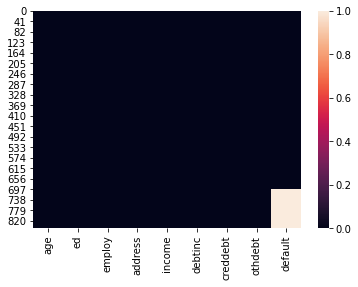

In [6]:
#visualizing Null values using seaborn
sns.heatmap(df.isnull())

In [7]:
filt=(df['default'].isnull()==False)  #(filtering out the NULL rows)

In [8]:
df=df.loc[filt]

In [9]:
df.head()

age  ed  employ  address  income  debtinc   creddebt   othdebt  default
0   41   3      17       12     176      9.3  11.359392  5.008608      1.0
1   27   1      10        6      31     17.3   1.362202  4.000798      0.0
2   40   1      15       14      55      5.5   0.856075  2.168925      0.0
3   41   1      15       14     120      2.9   2.658720  0.821280      0.0
4   24   2       2        0      28     17.3   1.787436  3.056564      1.0

In [10]:
df.shape

(700, 9)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       700 non-null    int64  
 1   ed        700 non-null    int64  
 2   employ    700 non-null    int64  
 3   address   700 non-null    int64  
 4   income    700 non-null    int64  
 5   debtinc   700 non-null    float64
 6   creddebt  700 non-null    float64
 7   othdebt   700 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 54.7 KB


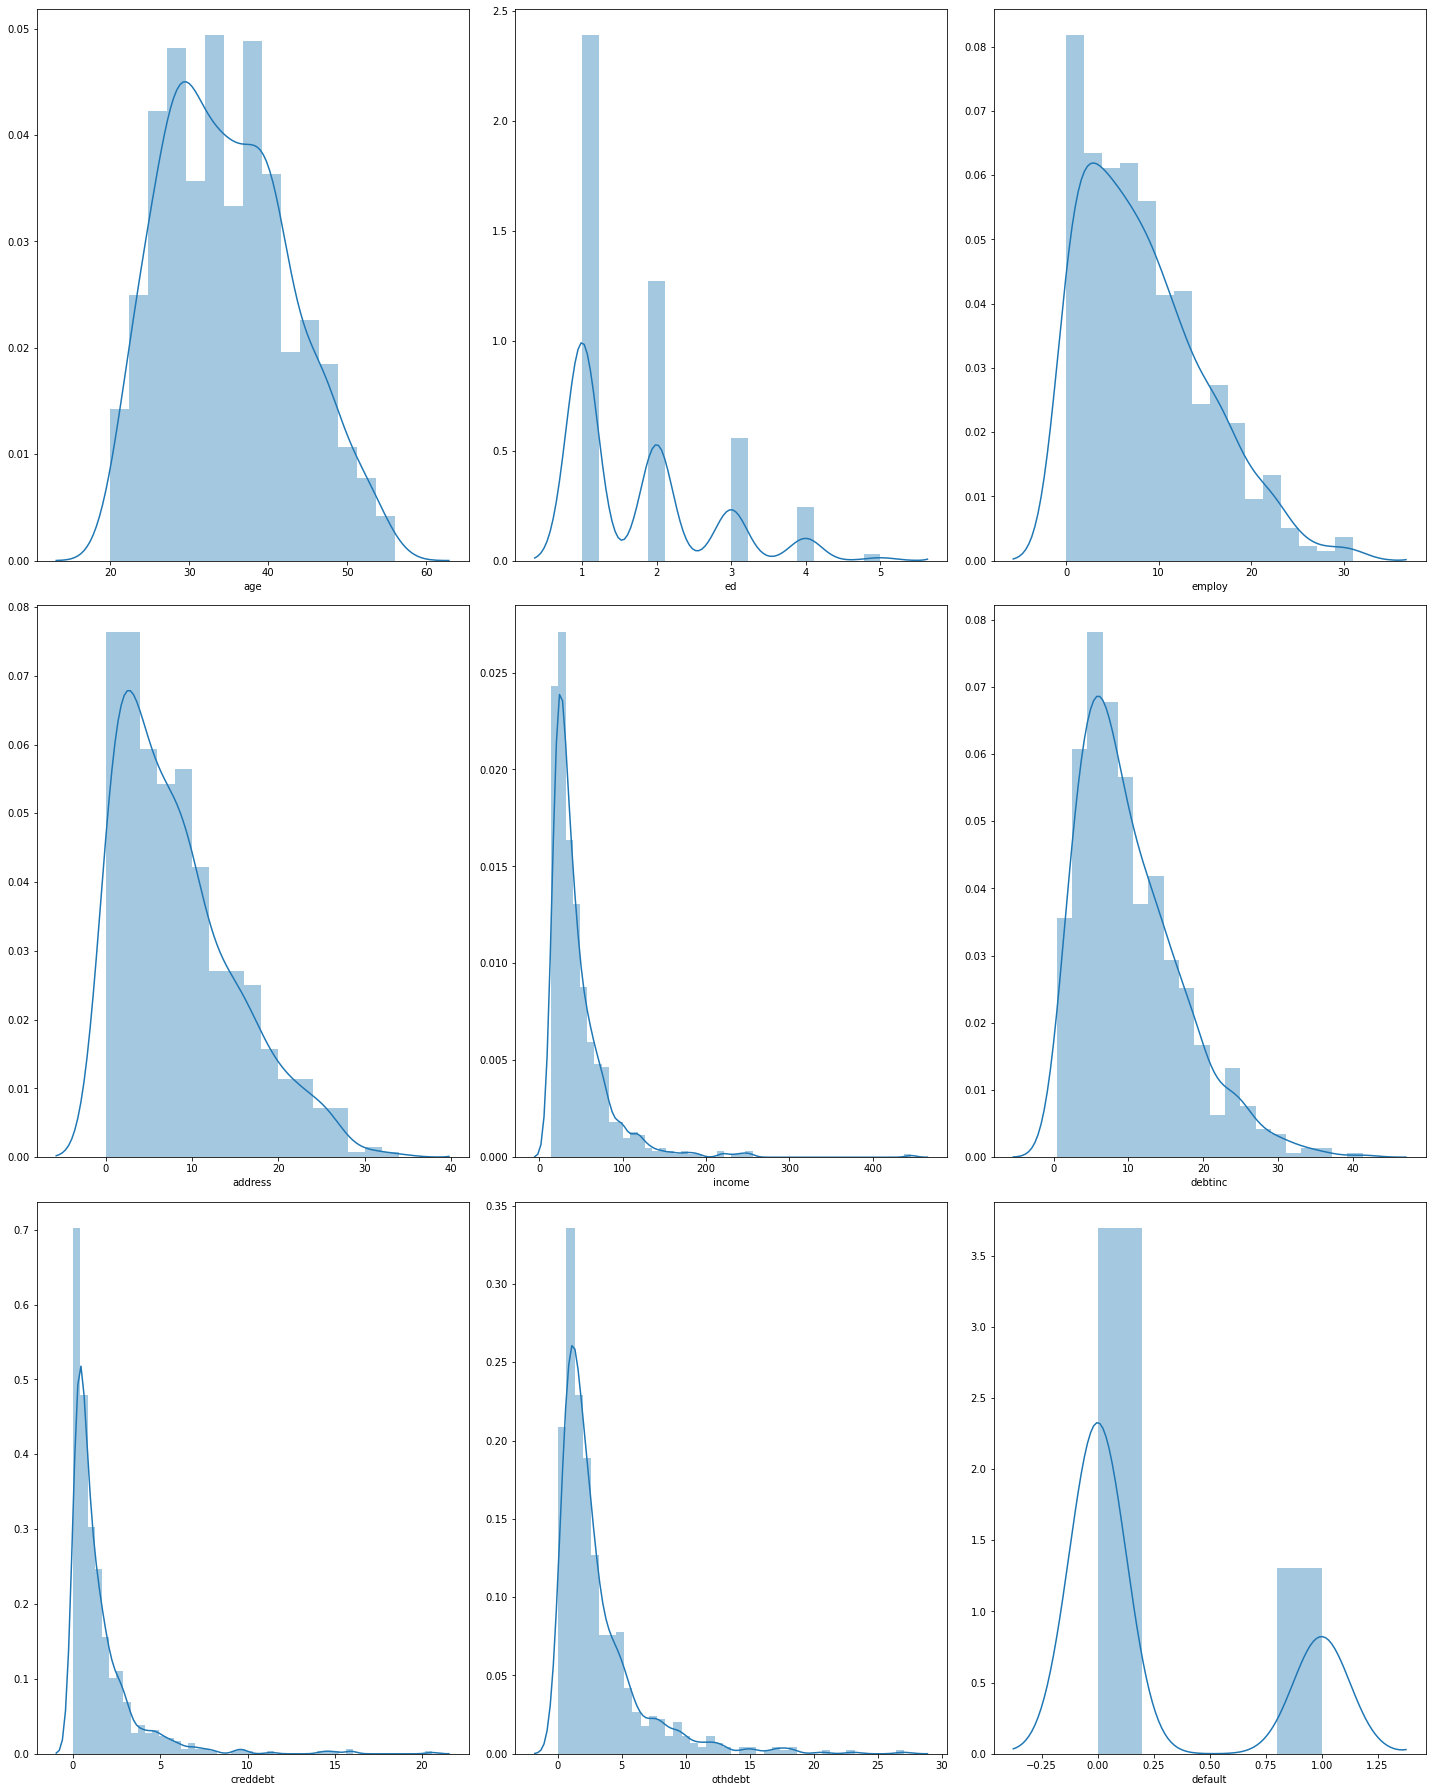

In [12]:
#seeing the distribution of data
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<10:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber+=1
plt.tight_layout()

In [13]:
#almost are data near to be normally distributed expect few columns

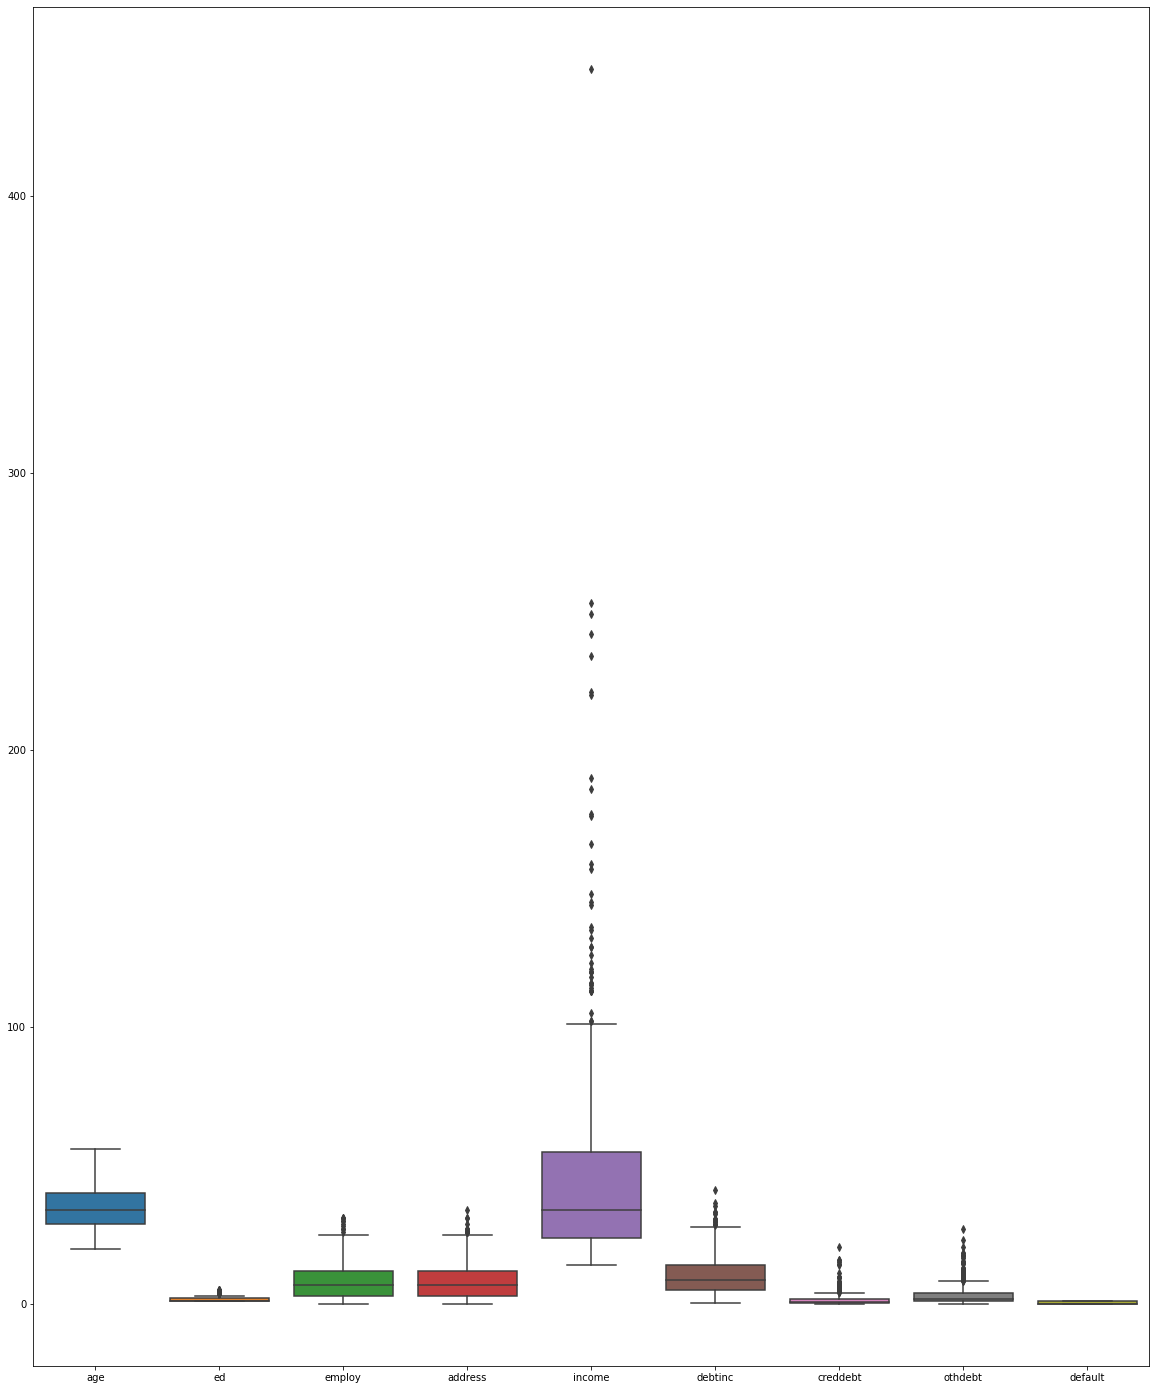

In [14]:
#now checking for outliers
fig,ax=plt.subplots(figsize=(20,25),facecolor='white')
sns.boxplot(data=df,width=0.8,ax=ax)

In [15]:
#income has the major outliers followed by otherdebt,debtinc,address,employ,ed

# Treating outliers
Outlier Detection technique
1.Using pairplot or distplot
2.using boxplot

Treating outliers
1.Zscore method
2.IQR method


There is also other method of treating the outliers by converting the feature using np.log(feature),but according to researchers this method normalises the data for sure inside the bell curve but is not preferred because it skews the data more which is not seen.

So basically we will see zscore method or IQR method which is widely used

# Log based treatment for outliers

Note--->> we wont be using this approch.https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4120293/
just for understanding


In [16]:
#we can see that our data (creddebt is skewed) and not normalized . we will normalize it using log

In [17]:
new_creddebt=np.log(df['creddebt'])

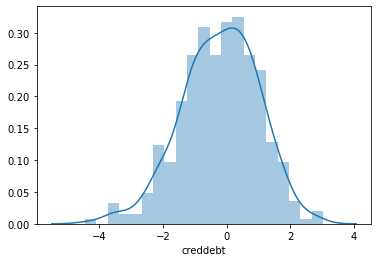

In [18]:
sns.distplot(new_creddebt)    #fantastic, but remember we wont use it reason- go through the website and check

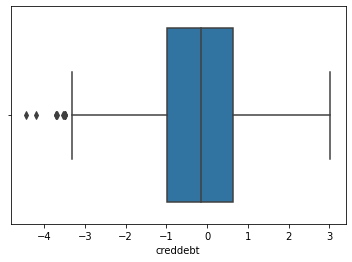

In [19]:
#now lets see still outlier exist in the new_creddebt
sns.boxplot(new_creddebt)                              #yes, there are outliers present in the negative side.

In [20]:
#Outliers are not considered as out of box info, but can be useful to know the uniqueness of the data. so they need not be removed

# Zscore based treatment

In [21]:
example=[1,2,4,2,3,22,2,1,3,5,6,4,3,2,6,78,10000,50000,2,3,80000] #remove outliers from this list
outliers=[]

In [22]:
def remove_outliers(data):
    threshold=3
    mean=np.mean(data)
    std=np.std(data)
    
    for i in data:
        zscore=(i-mean)/std
        
        if np.abs(zscore)>3:
            outliers.append(i)
    return outliers
    

In [23]:
remove_outliers(example)

[80000]

In [24]:
#The same way we will remove outliers from our features

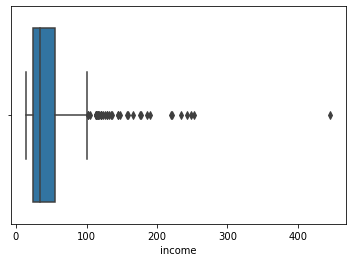

In [25]:
sns.boxplot(df['income'])   #huge outliers

In [26]:
new_income=np.array(df['income'])
len(new_income)

700

In [27]:
a=remove_outliers(new_income) 
a#these many outliers removed from income

[80000, 176, 159, 220, 157, 446, 242, 177, 221, 166, 190, 249, 234, 186, 253]

In [28]:
no_outlier_income=[]
for i in new_income:
    if i not in a:   #present in new_income(array) but not in a(outliers removed)
        no_outlier_income.append(i)

In [29]:
no_outlier_income

[31,
 55,
 120,
 28,
 25,
 67,
 38,
 19,
 25,
 16,
 23,
 64,
 29,
 100,
 49,
 41,
 72,
 61,
 26,
 52,
 43,
 26,
 27,
 16,
 32,
 69,
 64,
 58,
 37,
 20,
 22,
 26,
 27,
 35,
 45,
 22,
 54,
 24,
 50,
 31,
 59,
 41,
 48,
 14,
 16,
 35,
 26,
 21,
 42,
 25,
 20,
 52,
 25,
 28,
 24,
 34,
 69,
 100,
 80,
 28,
 42,
 23,
 55,
 28,
 75,
 23,
 46,
 31,
 20,
 21,
 34,
 100,
 26,
 44,
 51,
 21,
 17,
 37,
 39,
 27,
 45,
 32,
 29,
 20,
 45,
 36,
 29,
 28,
 17,
 23,
 15,
 54,
 18,
 15,
 54,
 82,
 52,
 19,
 31,
 113,
 26,
 27,
 121,
 75,
 28,
 50,
 26,
 60,
 45,
 39,
 41,
 24,
 51,
 64,
 33,
 65,
 73,
 27,
 20,
 37,
 19,
 27,
 22,
 22,
 43,
 68,
 36,
 25,
 68,
 27,
 18,
 35,
 60,
 21,
 57,
 23,
 28,
 24,
 37,
 16,
 45,
 135,
 25,
 68,
 41,
 26,
 25,
 33,
 44,
 51,
 76,
 23,
 30,
 33,
 39,
 32,
 28,
 29,
 26,
 26,
 44,
 26,
 26,
 24,
 102,
 24,
 38,
 44,
 79,
 22,
 28,
 20,
 73,
 21,
 22,
 18,
 34,
 24,
 35,
 46,
 57,
 80,
 34,
 29,
 27,
 43,
 56,
 16,
 78,
 22,
 17,
 28,
 21,
 40,
 33,
 18,
 28,
 47,
 3

In [30]:
len(no_outlier_income)

686

In [31]:
#number of outliers removed 
#700-686=14

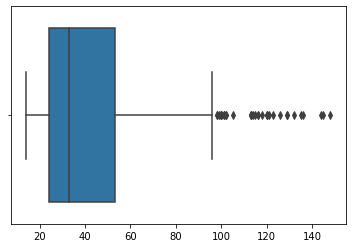

In [32]:
sns.boxplot(no_outlier_income)

# Here we can see that few outliers have been removed but there still exist some outliers. 
These outliers can be studied on the basis of domain knowledge or can be tried to refine in the next IQR technique.
Due to the scaling we see that there is no diff between the preprocessed outliers and the processed outliers. Its just because of scaling.
Now we will see the IQR technique of removing outliers

# IQR Treatment of outliers

In [33]:
df.head()

age  ed  employ  address  income  debtinc   creddebt   othdebt  default
0   41   3      17       12     176      9.3  11.359392  5.008608      1.0
1   27   1      10        6      31     17.3   1.362202  4.000798      0.0
2   40   1      15       14      55      5.5   0.856075  2.168925      0.0
3   41   1      15       14     120      2.9   2.658720  0.821280      0.0
4   24   2       2        0      28     17.3   1.787436  3.056564      1.0

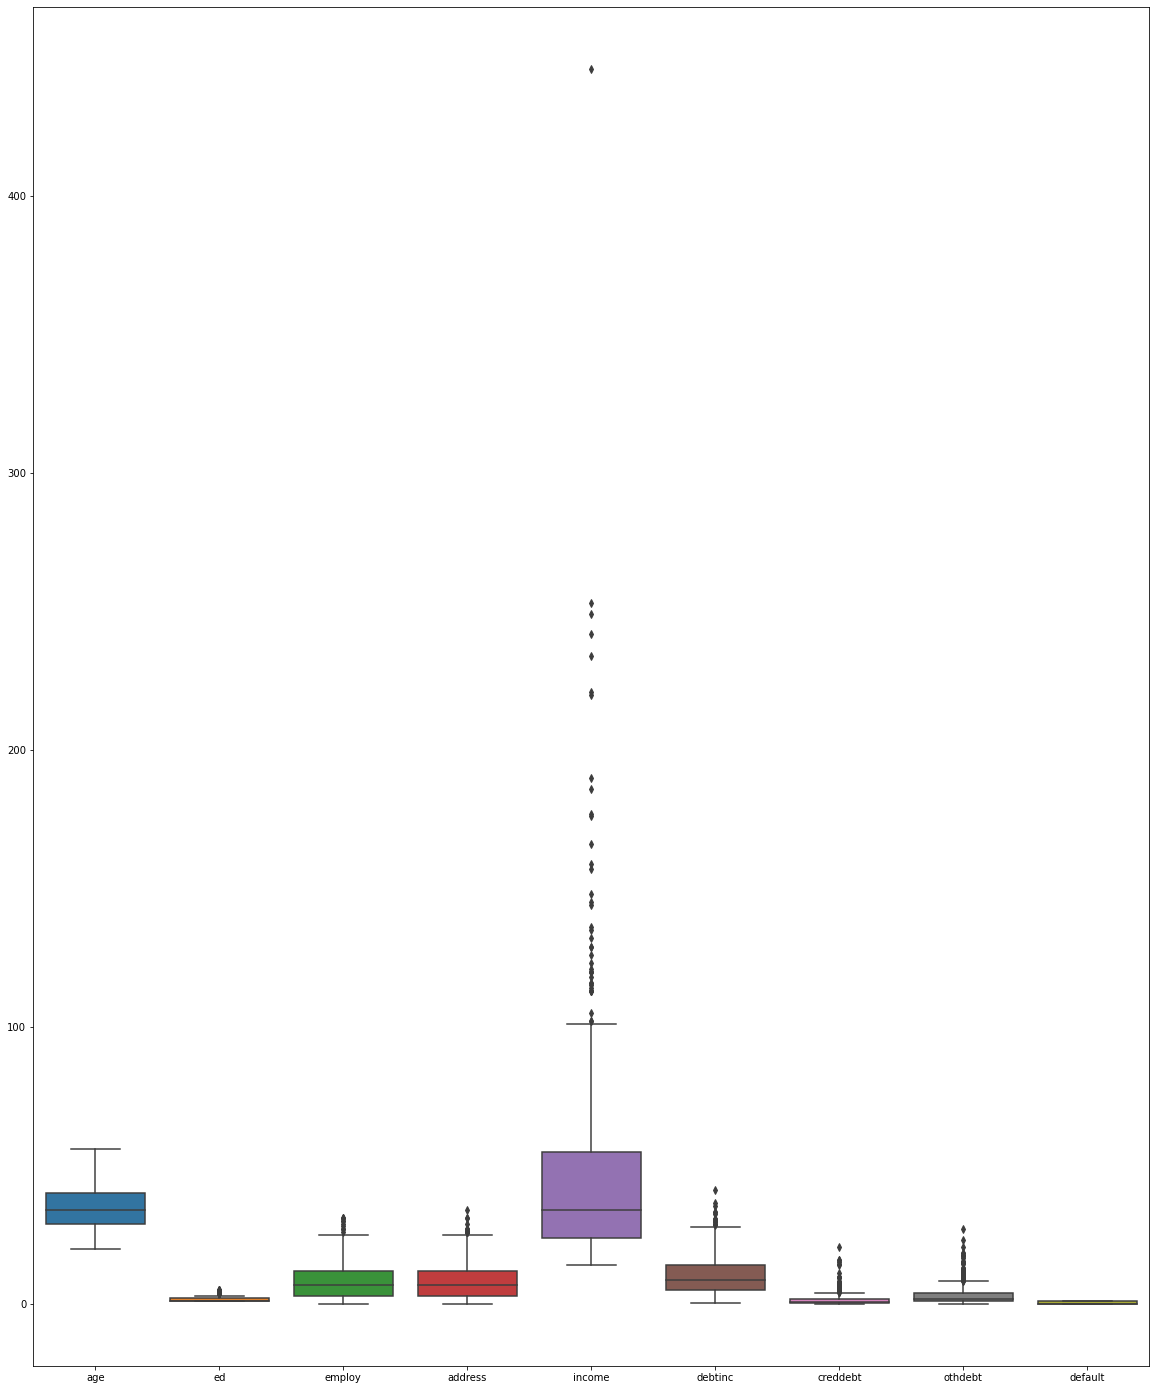

In [34]:
fig,ax=plt.subplots(figsize=(20,25),facecolor='white')
sns.boxplot(data=df,width=0.8)

In [35]:
q=df['ed'].quantile(0.98)
#we are removing the top 2% data from the ed column
data_cleaned=df[df['ed']<q]
q=df['employ'].quantile(0.93)
#we are removing top 7% of data from the employ column
data_cleaned=data_cleaned[data_cleaned['employ']<q]
q=data_cleaned['address'].quantile(0.95)
#we are removing the top 3% of data from the address column
data_cleaned=data_cleaned[data_cleaned['address']<q]
q=data_cleaned['income'].quantile(0.86)
#we are removing the top 15% of data from the income column
data_cleaned=data_cleaned[data_cleaned['income']<q]
q=data_cleaned['debtinc'].quantile(0.95)
#we are removing the top 3% data from debtincome column
data_cleaned=data_cleaned[data_cleaned['debtinc']<q]
q=data_cleaned['creddebt'].quantile(0.97)
#we are removing the top 3% data from creddebt column
data_cleaned=data_cleaned[data_cleaned['creddebt']<q]
q=data_cleaned['othdebt'].quantile(0.97)
#we are removing the top 3% data from othdebt column
data_cleaned=data_cleaned[data_cleaned['othdebt']<q]
q=data_cleaned['age'].quantile(0.95)
#we are removing the top 5% data from age column
data_cleaned=data_cleaned[data_cleaned['age']<q]


In [36]:
data_cleaned.shape #new data 

(403, 9)

In [37]:
df.shape  #old data

(700, 9)

In [38]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403 entries, 1 to 699
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       403 non-null    int64  
 1   ed        403 non-null    int64  
 2   employ    403 non-null    int64  
 3   address   403 non-null    int64  
 4   income    403 non-null    int64  
 5   debtinc   403 non-null    float64
 6   creddebt  403 non-null    float64
 7   othdebt   403 non-null    float64
 8   default   403 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 31.5 KB


In [39]:
data_cleaned.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')

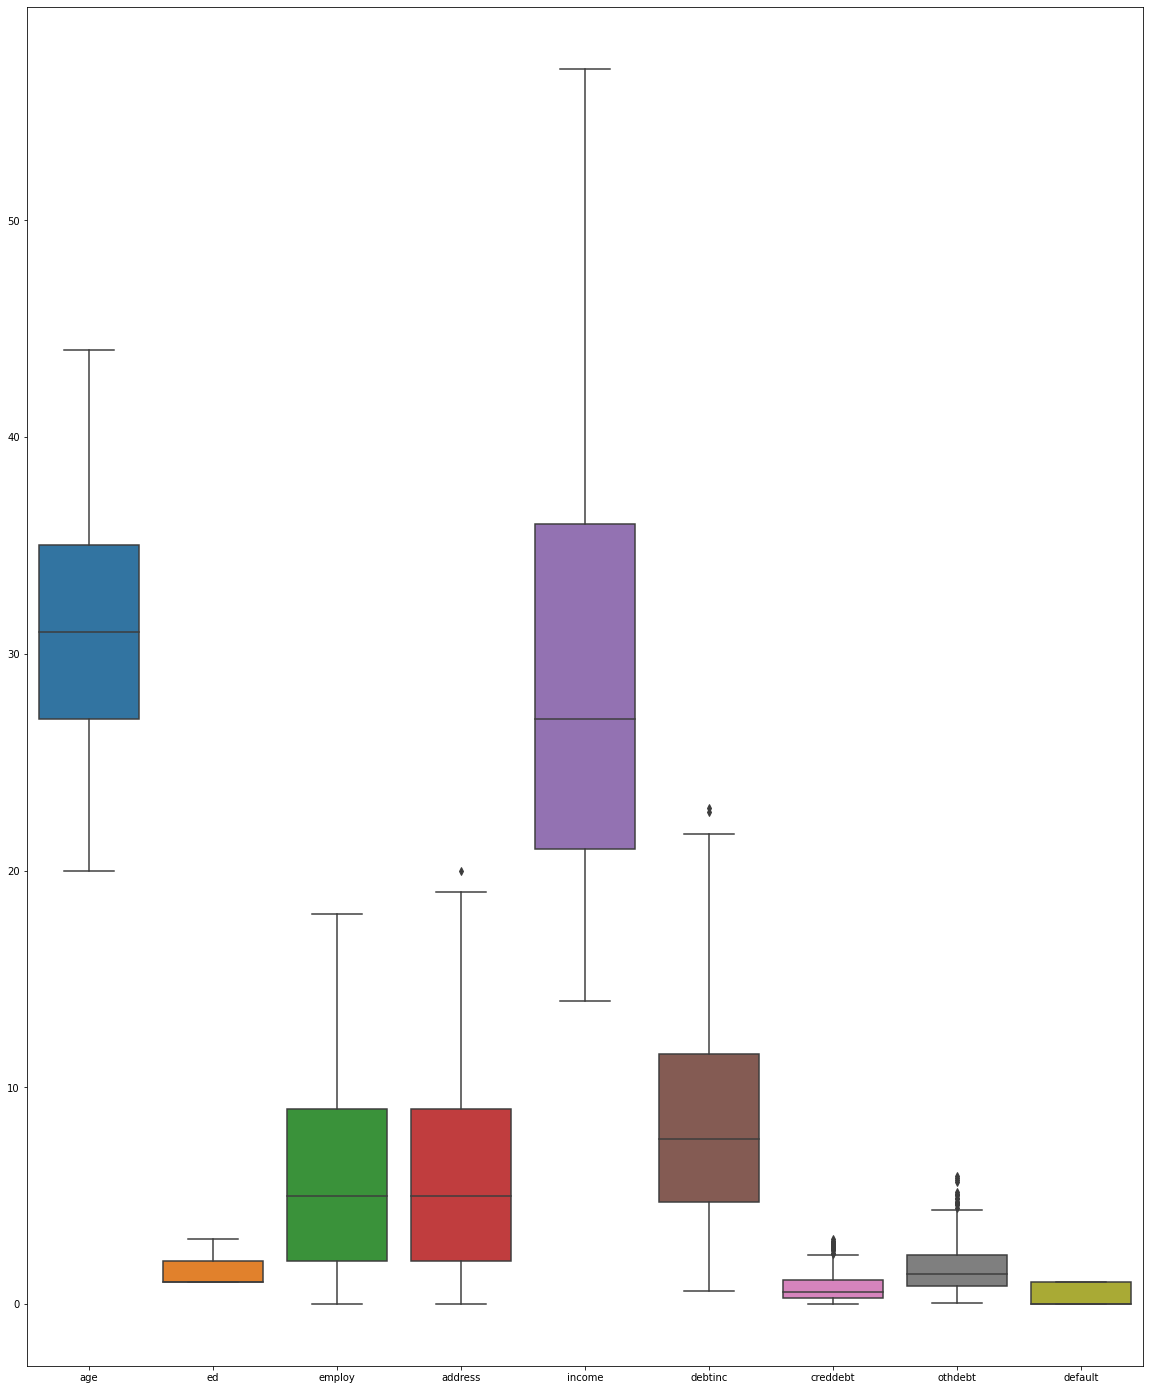

In [40]:
fig,ax=plt.subplots(figsize=(20,25),facecolor='white')
sns.boxplot(data=data_cleaned,width=0.8)

In [41]:
#we can say that we have almost removed outliers from the dataset. The remainig ones are the good outliers which are giving some unique info so need not remove them

In [42]:
data_cleaned.head()

age  ed  employ  address  income  debtinc  creddebt   othdebt  default
1   27   1      10        6      31     17.3  1.362202  4.000798      0.0
2   40   1      15       14      55      5.5  0.856075  2.168925      0.0
4   24   2       2        0      28     17.3  1.787436  3.056564      1.0
5   41   2       5        5      25     10.2  0.392700  2.157300      0.0
7   43   1      12       11      38      3.6  0.128592  1.239408      0.0

In [43]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403 entries, 1 to 699
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       403 non-null    int64  
 1   ed        403 non-null    int64  
 2   employ    403 non-null    int64  
 3   address   403 non-null    int64  
 4   income    403 non-null    int64  
 5   debtinc   403 non-null    float64
 6   creddebt  403 non-null    float64
 7   othdebt   403 non-null    float64
 8   default   403 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 31.5 KB


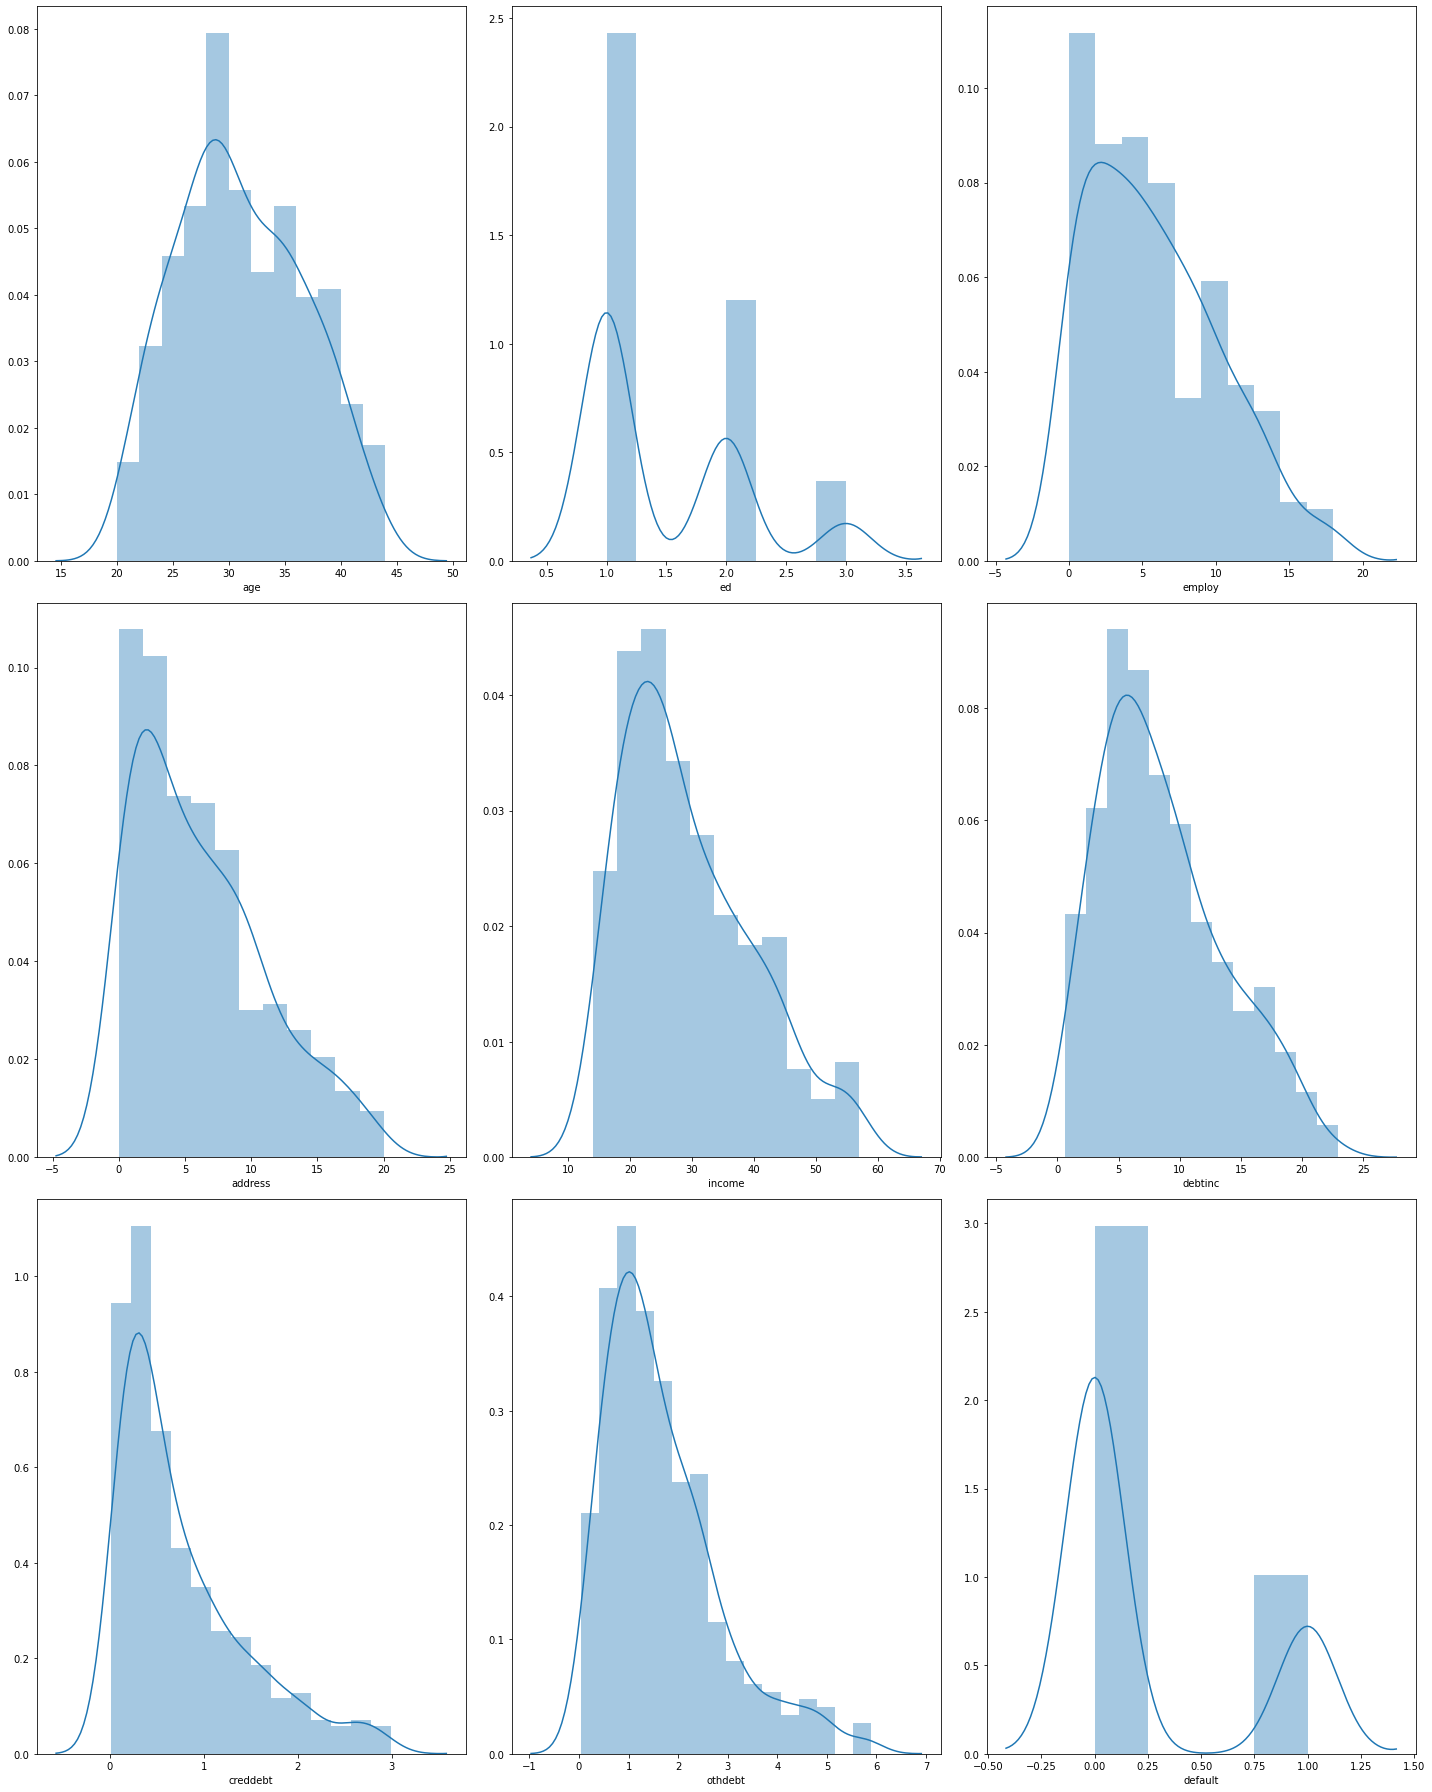

In [44]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data_cleaned:
    if plotnumber<10:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data_cleaned[column])
        plt.xlabel(column)
    plotnumber+=1
plt.tight_layout()

In [45]:
#cool are data is normally distributed

In [46]:
#now we will plot all the graphs and remove insights from it(7th june work also we will complete VIF)

In [47]:
#Seaborn work

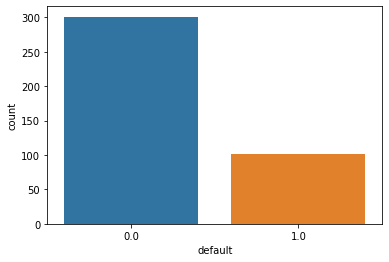

In [48]:
sns.countplot(x=data_cleaned['default'],data=data_cleaned)   #It shows that max no of people have not defaulted

In [49]:
data_cleaned.head()

age  ed  employ  address  income  debtinc  creddebt   othdebt  default
1   27   1      10        6      31     17.3  1.362202  4.000798      0.0
2   40   1      15       14      55      5.5  0.856075  2.168925      0.0
4   24   2       2        0      28     17.3  1.787436  3.056564      1.0
5   41   2       5        5      25     10.2  0.392700  2.157300      0.0
7   43   1      12       11      38      3.6  0.128592  1.239408      0.0

Text(0.5, 0, 'age')

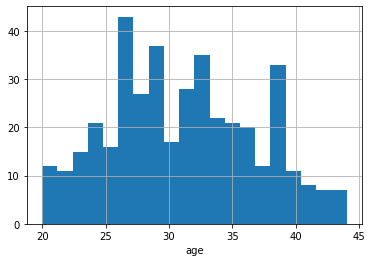

In [50]:
data_cleaned['age'].hist(bins=20)
plt.xlabel('age')

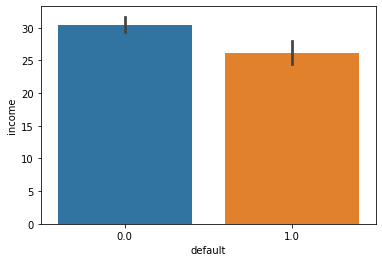

In [51]:
sns.barplot(x='default',y='income',data=data_cleaned)

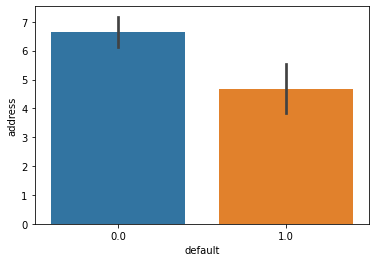

In [52]:
sns.barplot(x='default',y='address',data=data_cleaned)

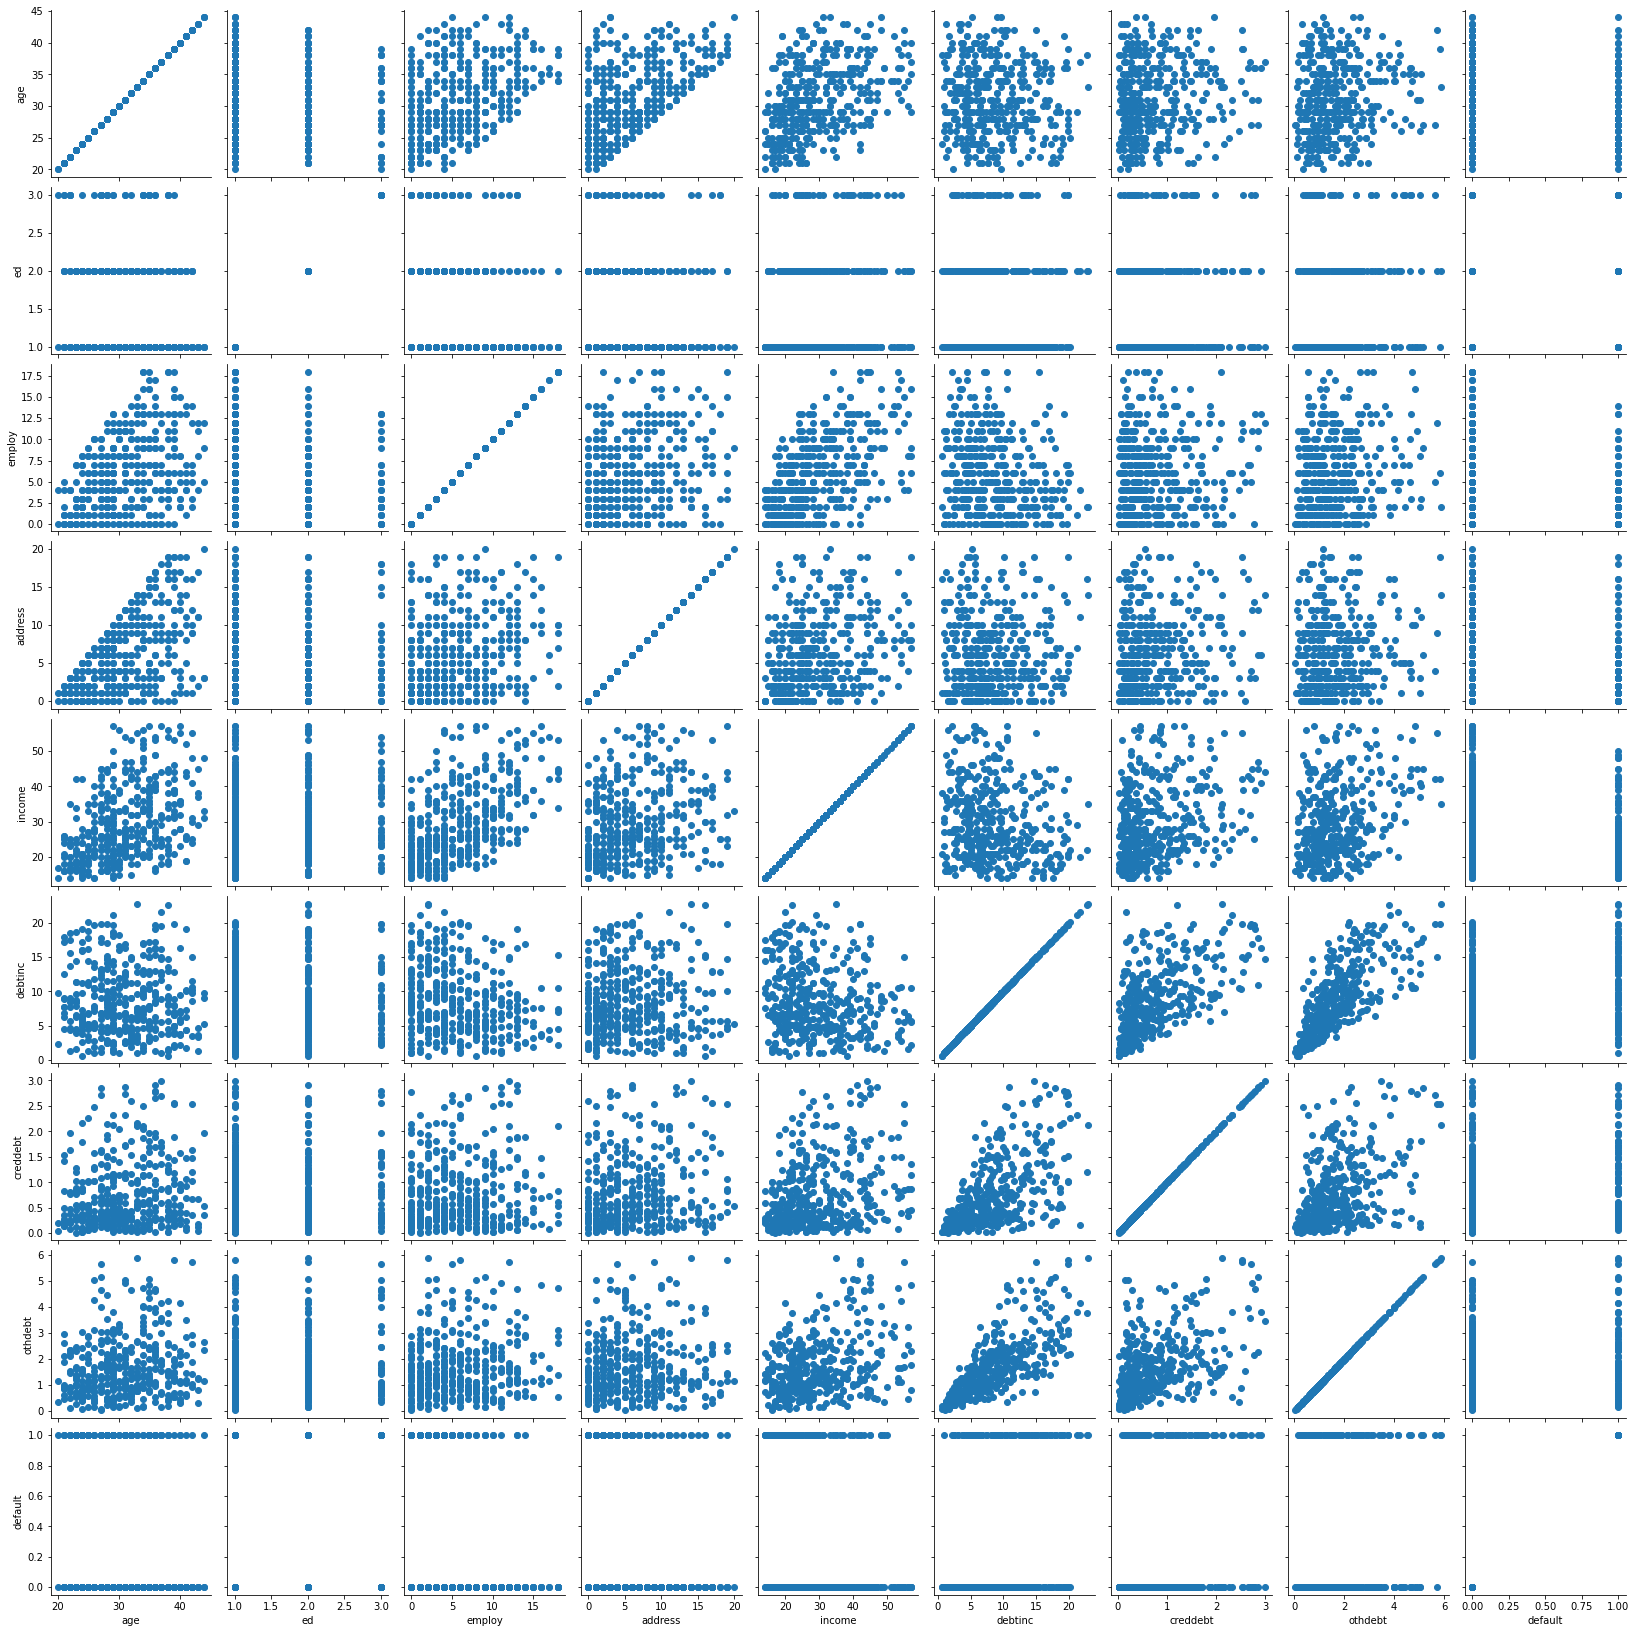

In [53]:
g = sns.PairGrid(data_cleaned)
g.map(plt.scatter)

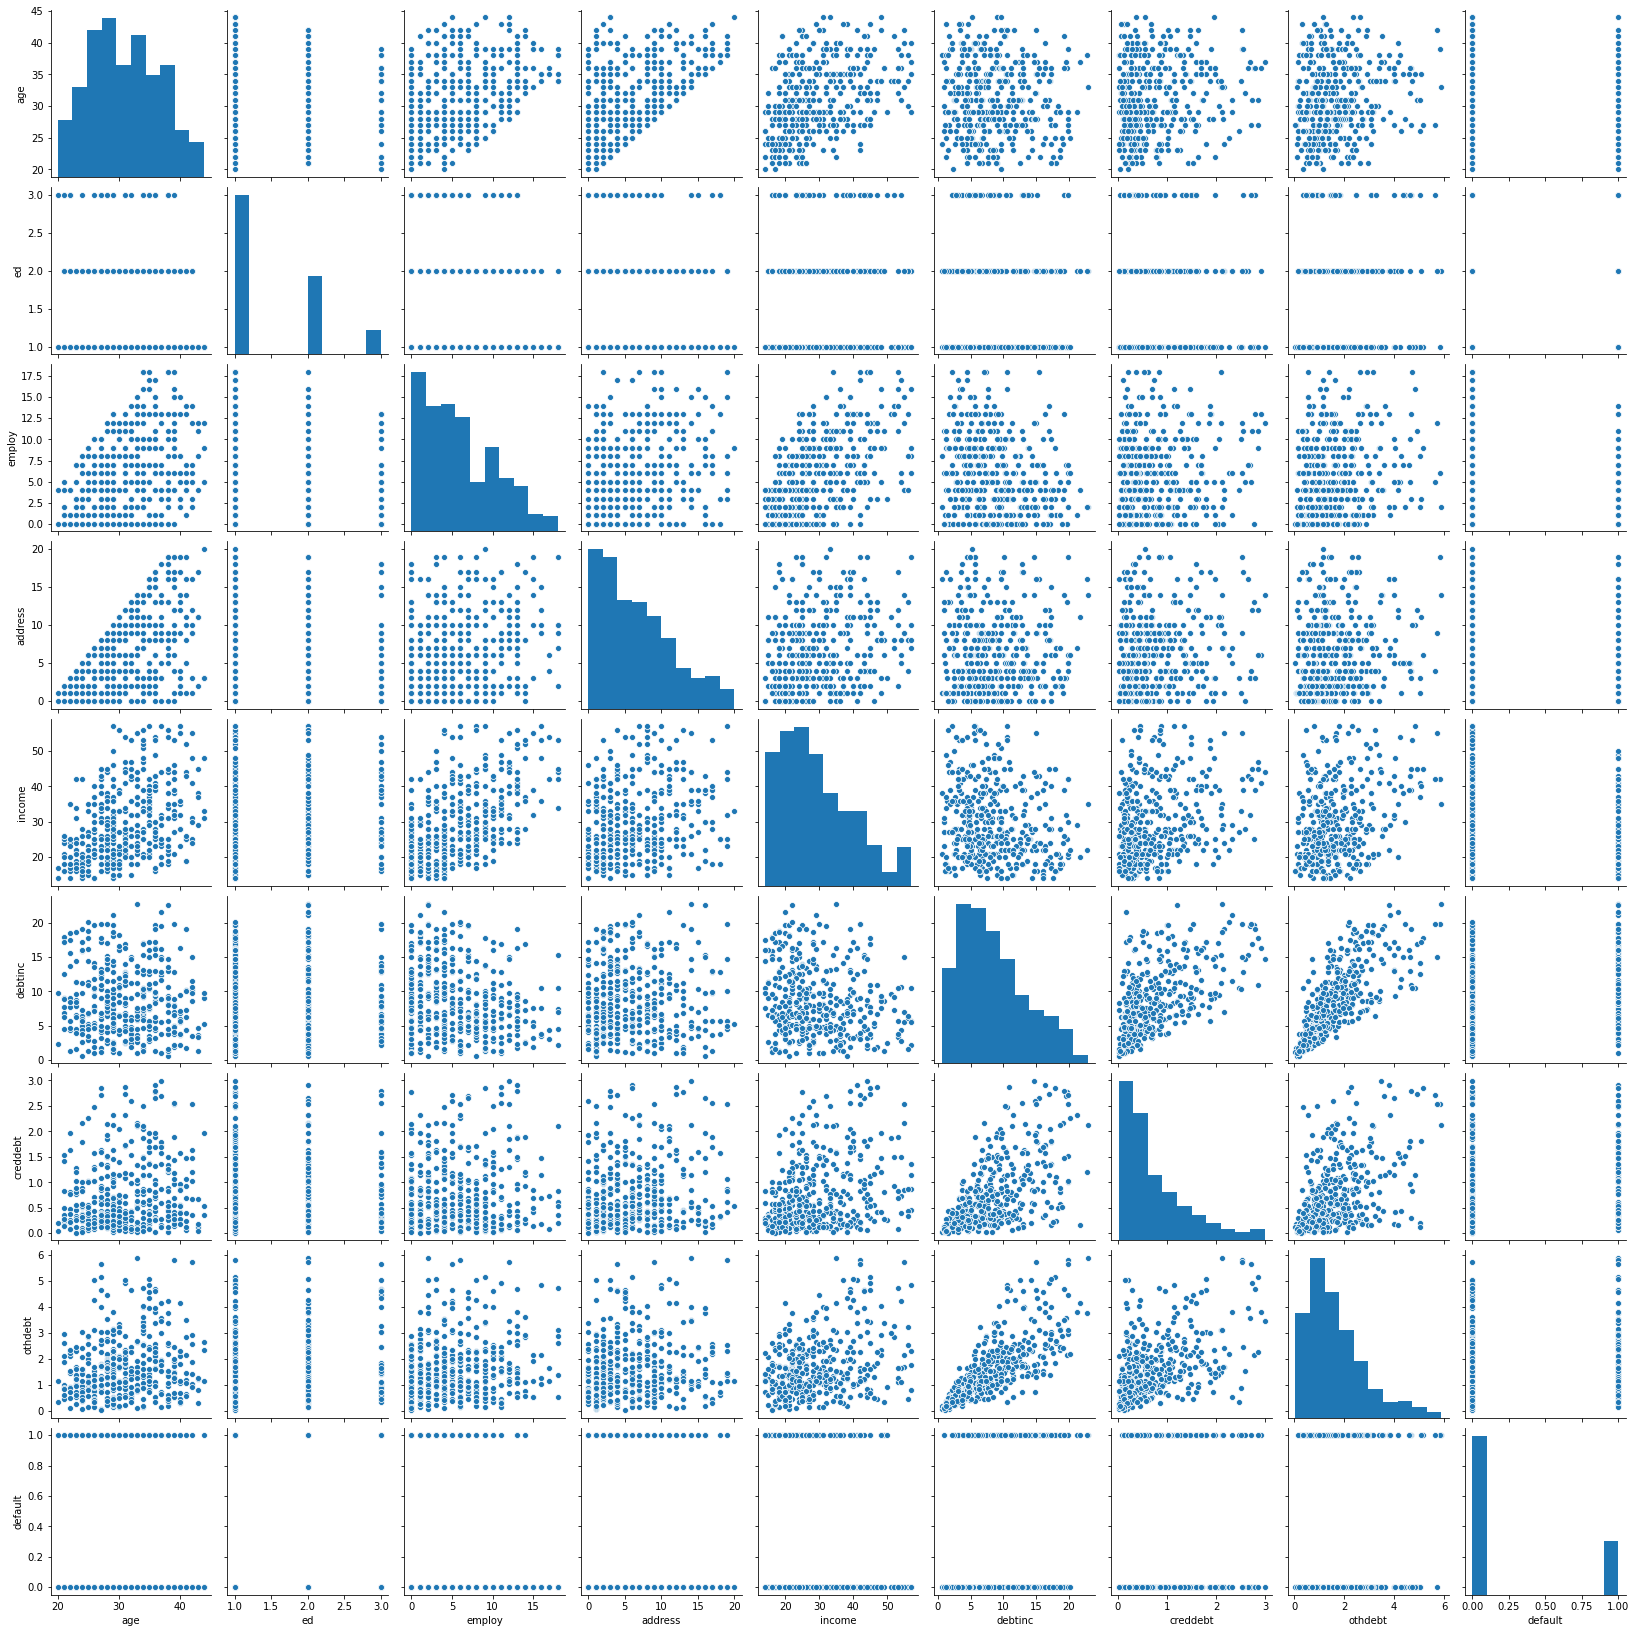

In [54]:
sns.pairplot(data_cleaned)

In [55]:
data_cleaned.corr()

age        ed    employ   address    income   debtinc  \
age       1.000000 -0.122235  0.389358  0.546113  0.433277 -0.051610   
ed       -0.122235  1.000000 -0.195489 -0.045522  0.122505  0.037110   
employ    0.389358 -0.195489  1.000000  0.225812  0.561153 -0.195165   
address   0.546113 -0.045522  0.225812  1.000000  0.260780  0.029673   
income    0.433277  0.122505  0.561153  0.260780  1.000000 -0.151283   
debtinc  -0.051610  0.037110 -0.195165  0.029673 -0.151283  1.000000   
creddebt  0.161835  0.065921  0.095445  0.170936  0.300479  0.603151   
othdebt   0.153397  0.122200  0.125423  0.114244  0.358084  0.747069   
default  -0.166063  0.135635 -0.349961 -0.172179 -0.177684  0.312587   

          creddebt   othdebt   default  
age       0.161835  0.153397 -0.166063  
ed        0.065921  0.122200  0.135635  
employ    0.095445  0.125423 -0.349961  
address   0.170936  0.114244 -0.172179  
income    0.300479  0.358084 -0.177684  
debtinc   0.603151  0.747069  0.312587  
creddebt  1.000000  0.469332  0.188578  
othdebt   0.469332  1.000000  0.132360  
default   0.188578  0.132360  1.000000

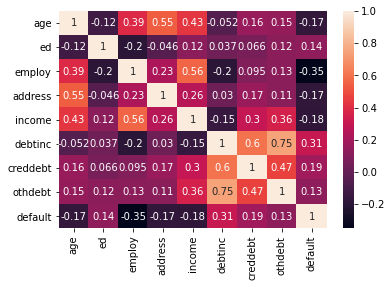

In [56]:
sns.heatmap(data_cleaned.corr(),annot=True)

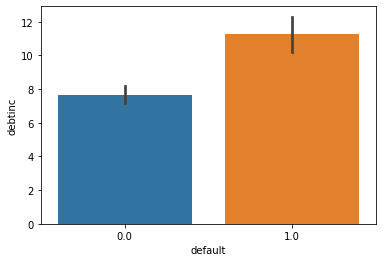

In [57]:
sns.barplot(x='default',y='debtinc',data=data_cleaned)

In [58]:
data_cleaned['ed'].value_counts()

1    245
2    121
3     37
Name: ed, dtype: int64

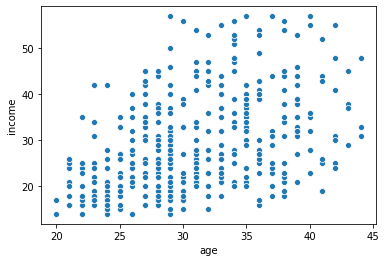

In [59]:
sns.scatterplot(x='age',y='income',data=data_cleaned)

Text(0.5, 1.0, 'creddebt vc debtinc')

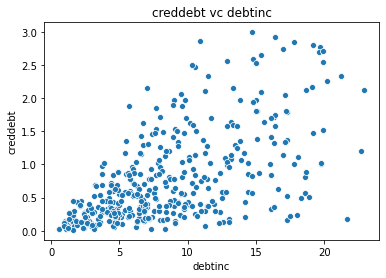

In [60]:
sns.scatterplot(x='debtinc',y='creddebt',data=data_cleaned)
plt.title('creddebt vc debtinc')

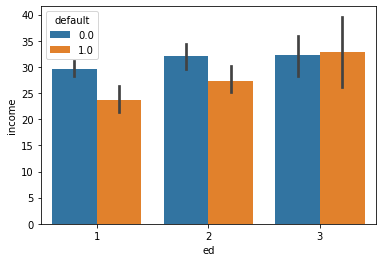

In [61]:
sns.barplot(x='ed',y='income',data=data_cleaned,hue='default')

In [62]:
x=data_cleaned.drop(columns=['default'])
y=data_cleaned['default']

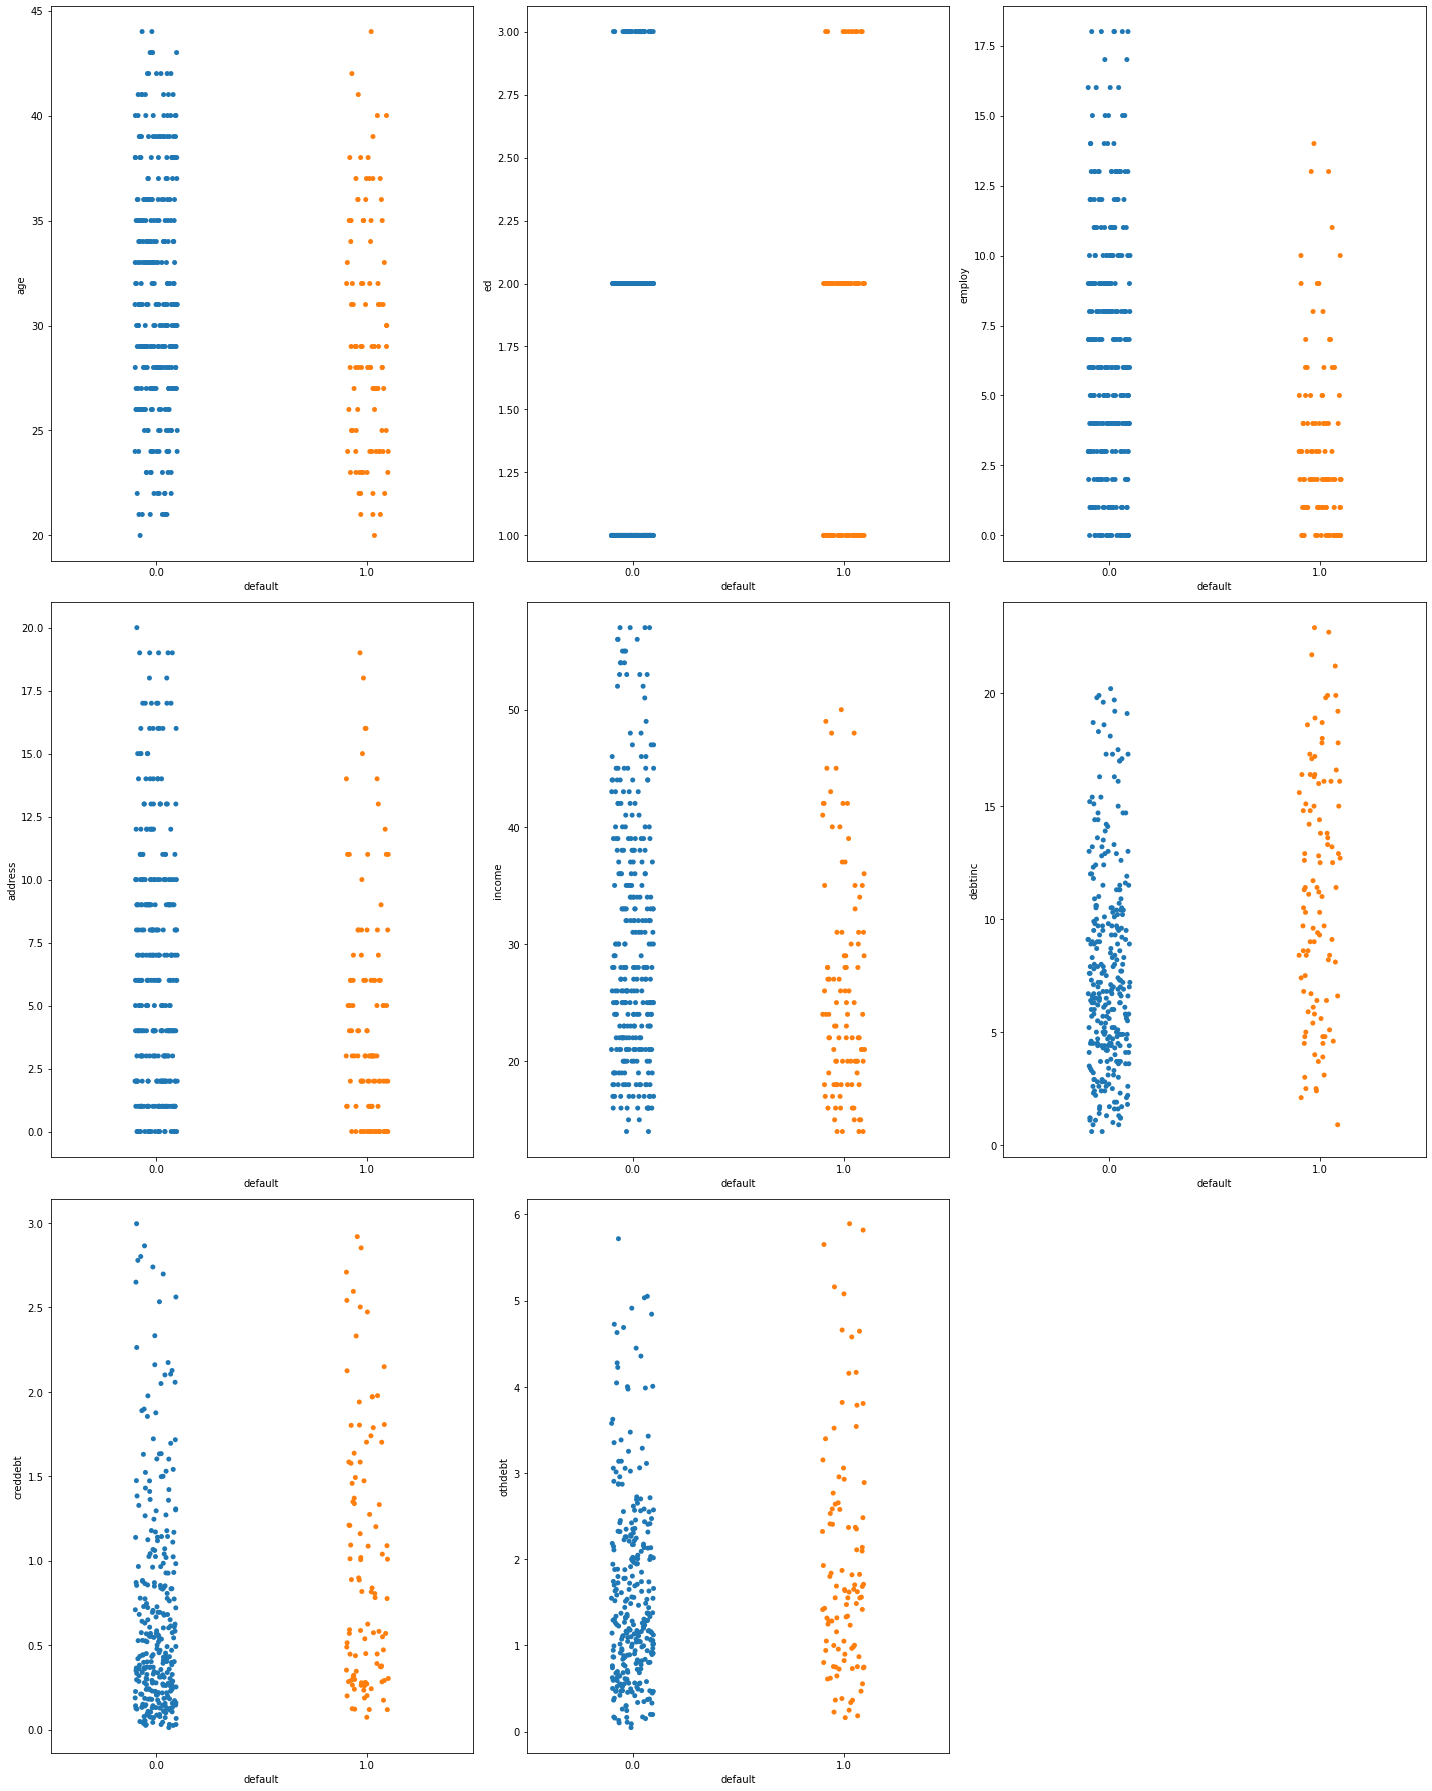

In [63]:
plt.figure(figsize=(20,25),facecolor='white')     #to see whether are data is balanced or no? it is balanced in this case
pltnumber=1

for column in x:
    if pltnumber<10:
        ax=plt.subplot(3,3,pltnumber)
        sns.stripplot(y,x[column])
        
        
    pltnumber+=1
    
plt.tight_layout()
        
        

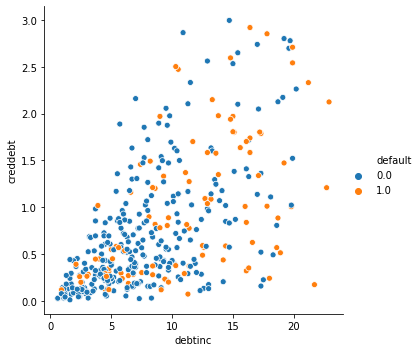

In [64]:
sns.relplot(x='debtinc',y='creddebt',data=data_cleaned,hue='default')   

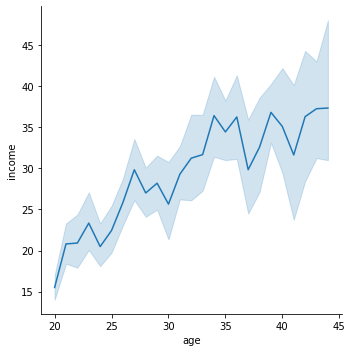

In [65]:
sns.relplot(x='age',y='income',data=data_cleaned,kind='line')  #clearly say that age and income have linearity

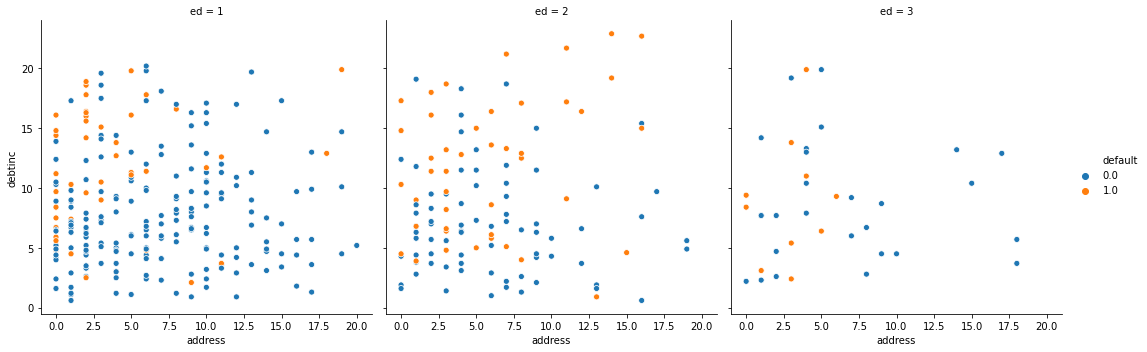

In [66]:
sns.relplot(x='address',y='debtinc',hue='default',col='ed',data=data_cleaned)

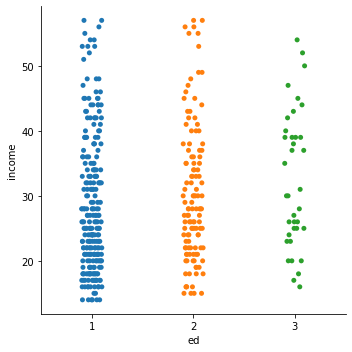

In [67]:
sns.catplot(x='ed',y='income',data=data_cleaned)

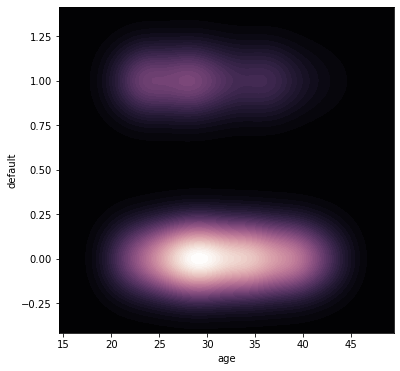

In [68]:
f,ax=plt.subplots(figsize=(6,6))
cmap=sns.cubehelix_palette(as_cmap=True,dark=0,light=1,reverse=True)   #more concentration of data is shown(more num of ppl not defaulted bet 26-35)
sns.kdeplot(data_cleaned['age'],data_cleaned['default'],cmap=cmap,n_levels=60,shade=True)

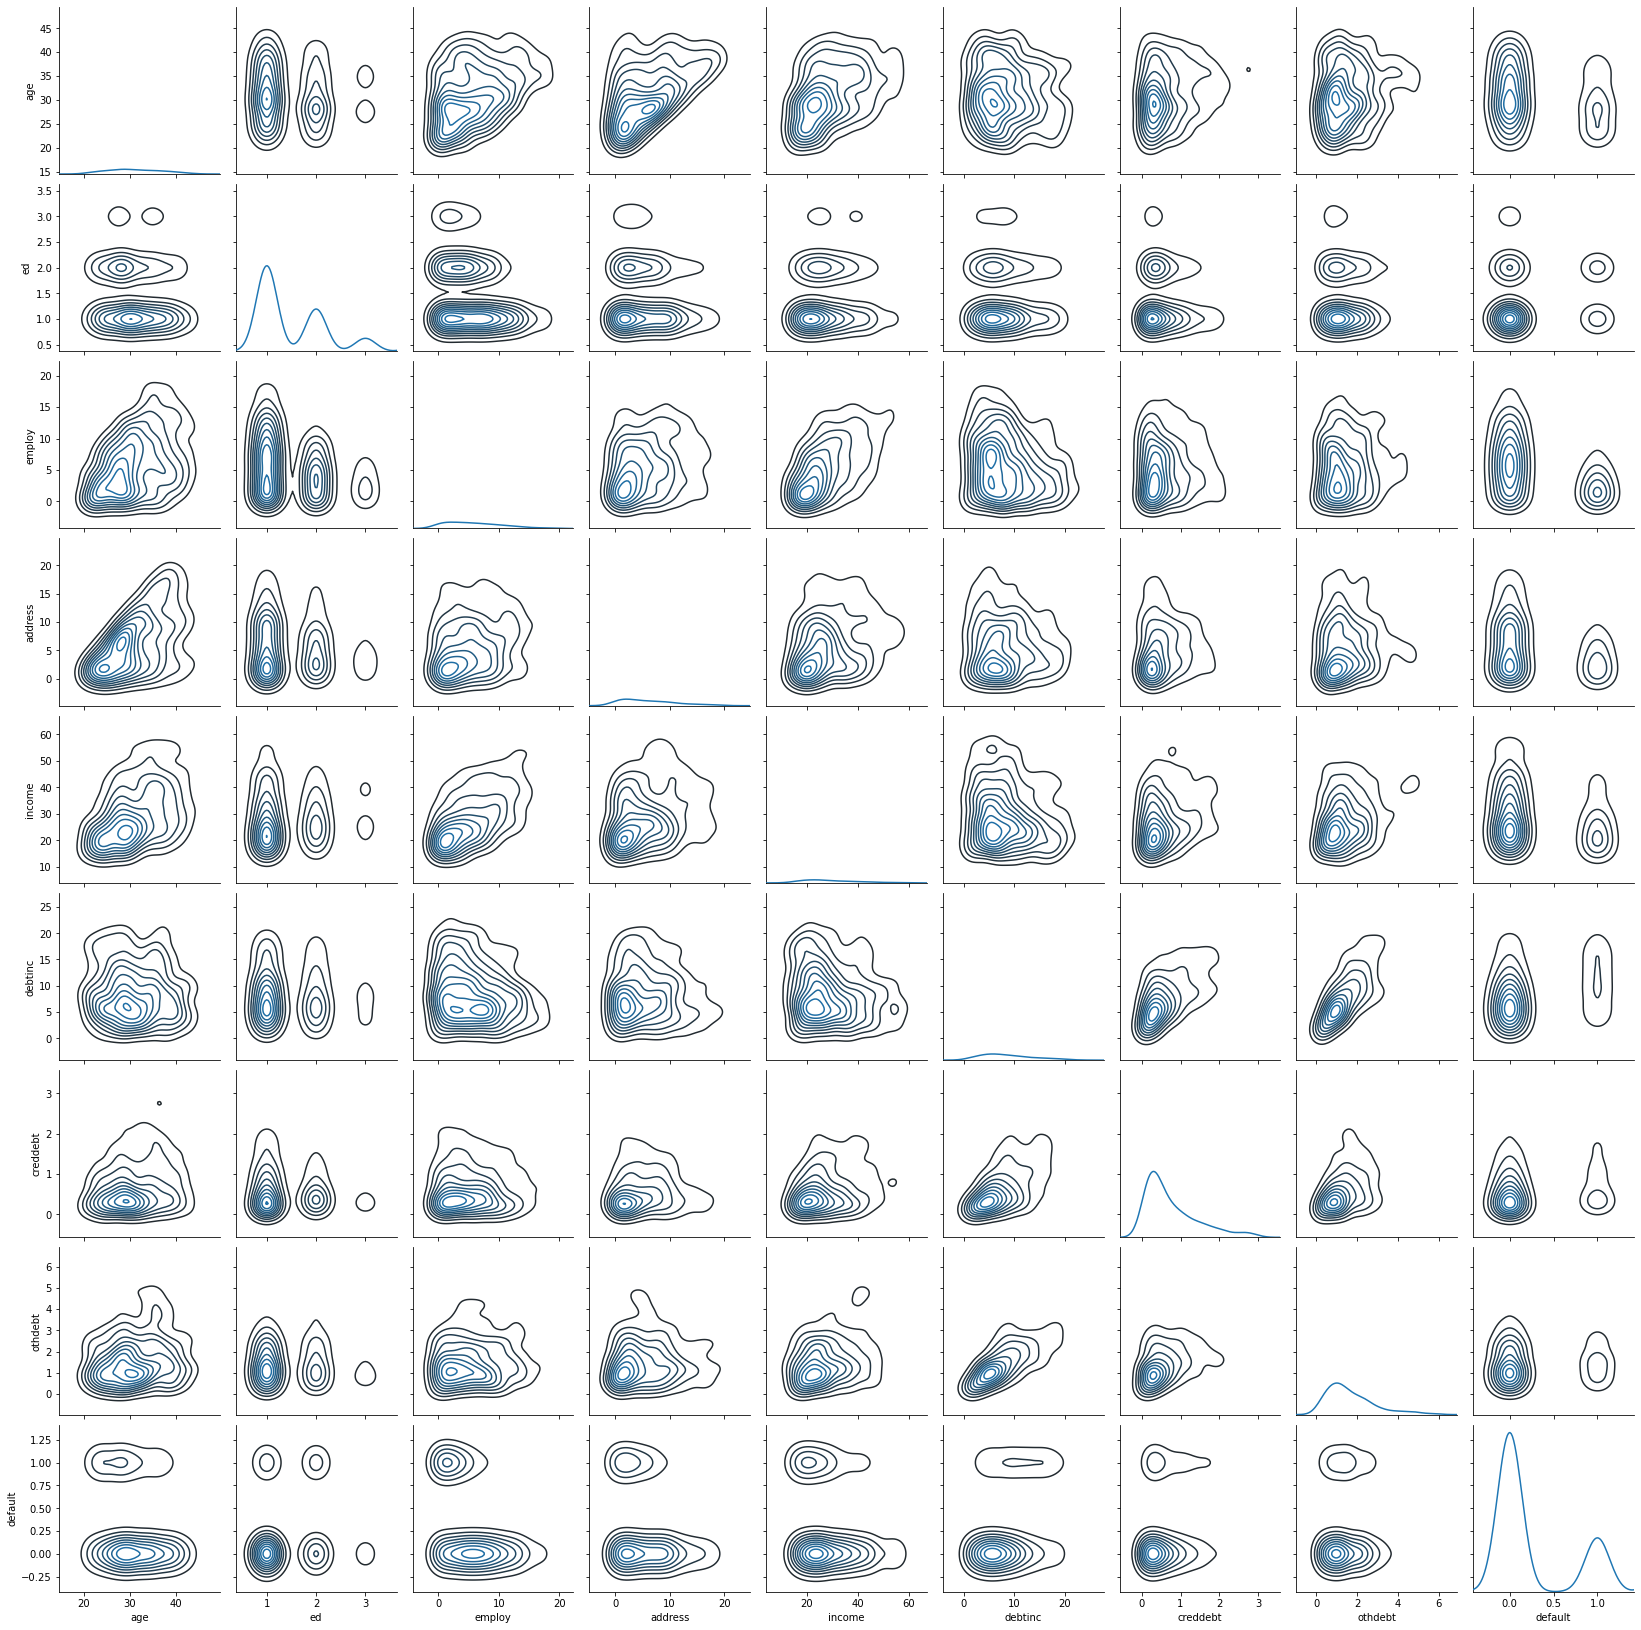

In [69]:
g=sns.PairGrid(data_cleaned)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot,n_levels=10)

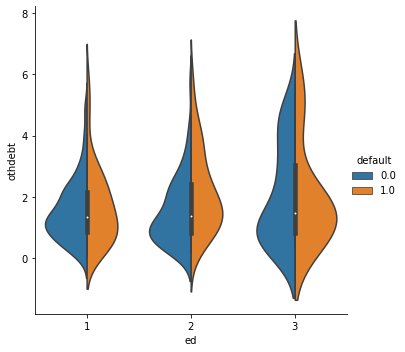

In [70]:
sns.catplot(x='ed',y='othdebt',hue='default',kind='violin',data=data_cleaned,split=True)

In [71]:
#do this much,latter part ill tell including VIF

In [72]:
#after seaborn we will do VIF(variance inflation factor)

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

In [74]:
x=data_cleaned.drop(columns='default')

In [75]:
y=data_cleaned['default']

In [76]:
#now we are going to check multicollinearity between the features in x... if VIF>5 we will drop that

In [77]:
scaler=StandardScaler()

In [78]:
x_scaled=scaler.fit_transform(x)

In [79]:
variables=x_scaled

In [80]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(variables,i) for i in range(variables.shape[1])]
vif['Features']=x.columns

In [81]:
variables.shape[1]

8

In [82]:
vif

VIF  Features
0  1.717169       age
1  1.167731        ed
2  1.700799    employ
3  1.444568   address
4  4.456602    income
5  9.316473   debtinc
6  2.913657  creddebt
7  6.573418   othdebt

In [83]:
df=data_cleaned.copy()

In [84]:
df

age  ed  employ  address  income  debtinc  creddebt   othdebt  default
1     27   1      10        6      31     17.3  1.362202  4.000798      0.0
2     40   1      15       14      55      5.5  0.856075  2.168925      0.0
4     24   2       2        0      28     17.3  1.787436  3.056564      1.0
5     41   2       5        5      25     10.2  0.392700  2.157300      0.0
7     43   1      12       11      38      3.6  0.128592  1.239408      0.0
..   ...  ..     ...      ...     ...      ...       ...       ...      ...
693   22   3       0        2      20      4.7  0.219020  0.720980      0.0
695   36   2       6       15      27      4.6  0.262062  0.979938      1.0
696   29   2       6        4      21     11.5  0.369495  2.045505      0.0
697   33   1      15        3      32      7.6  0.491264  1.940736      0.0
699   37   1      12       14      44     14.7  2.994684  3.473316      0.0

[403 rows x 9 columns]

In [85]:
df.drop(columns='debtinc',inplace=True)

In [86]:
df.head()

age  ed  employ  address  income  creddebt   othdebt  default
1   27   1      10        6      31  1.362202  4.000798      0.0
2   40   1      15       14      55  0.856075  2.168925      0.0
4   24   2       2        0      28  1.787436  3.056564      1.0
5   41   2       5        5      25  0.392700  2.157300      0.0
7   43   1      12       11      38  0.128592  1.239408      0.0

In [87]:
x=df.drop(columns='default')

In [88]:
x.head()

age  ed  employ  address  income  creddebt   othdebt
1   27   1      10        6      31  1.362202  4.000798
2   40   1      15       14      55  0.856075  2.168925
4   24   2       2        0      28  1.787436  3.056564
5   41   2       5        5      25  0.392700  2.157300
7   43   1      12       11      38  0.128592  1.239408

In [89]:
y=df['default']

In [90]:
y.head()

1    0.0
2    0.0
4    1.0
5    0.0
7    0.0
Name: default, dtype: float64

# Logistic Regression


In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,auc,roc_auc_score,roc_curve

In [92]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=85)

In [93]:
log_reg=LogisticRegression()

In [94]:
log_reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [95]:
y_pred=log_reg.predict(x_test)

In [96]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[89,  6],
       [18,  8]], dtype=int64)

In [97]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [98]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.8016528925619835

In [99]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.9368421052631579

In [100]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.8317757009345794

In [101]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8811881188118812

In [102]:
auc = roc_auc_score(y_test, y_pred)
auc

0.6222672064777328

In [103]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

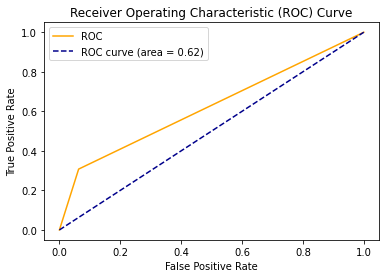

In [104]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Decision Tree

In [105]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix ,roc_auc_score , roc_curve

In [106]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=80)

In [107]:
classifier = DecisionTreeClassifier()

In [108]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [109]:
y_pred = classifier.predict(x_test)

In [110]:
conf_mat = confusion_matrix(y_test,y_pred)

In [111]:
conf_mat

array([[70, 16],
       [23, 12]], dtype=int64)

In [112]:
true_positive  = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative  = conf_mat[1][1]

In [113]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.6776859504132231

In [114]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.813953488372093

In [115]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.7526881720430108

In [116]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.782122905027933

In [117]:
auc = roc_auc_score(y_test, y_pred)
auc

0.578405315614618

In [118]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

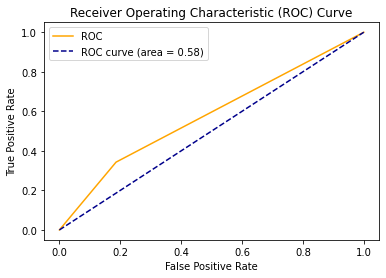

In [119]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Using Random Forest

In [120]:
from sklearn.ensemble import RandomForestClassifier
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=85)
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [121]:
rfc_pred = rfc.predict(x_test)

In [122]:
conf_mat = confusion_matrix(y_test,rfc_pred)

In [123]:
conf_mat

array([[90,  5],
       [19,  7]], dtype=int64)

In [124]:
true_positive  = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative  = conf_mat[1][1]

In [125]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.8016528925619835

In [126]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.9473684210526315

In [127]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.8256880733944955

In [128]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8823529411764707

In [129]:
auc = roc_auc_score(y_test, rfc_pred)
auc

0.6082995951417004

In [130]:
fpr, tpr, thresholds = roc_curve(y_test, rfc_pred)

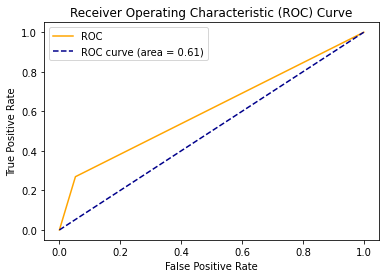

In [131]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Naive Bayes

In [132]:
from sklearn.naive_bayes import GaussianNB
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=85)
from sklearn.metrics import confusion_matrix ,roc_auc_score , roc_curve,accuracy_score


In [133]:
nbc = GaussianNB()

In [134]:
nbc.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [135]:
y_pred = nbc.predict(x_test)

In [136]:
conf_mat = confusion_matrix(y_test,y_pred)

In [137]:
conf_mat

array([[99, 15],
       [14, 14]], dtype=int64)

In [138]:
true_positive  = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative  = conf_mat[1][1]

In [139]:
accuracy_score(y_test,y_pred)

0.795774647887324

In [140]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.868421052631579

In [141]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.8761061946902655

In [142]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8722466960352423

In [143]:
auc = roc_auc_score(y_test, y_pred)
auc

0.6842105263157896

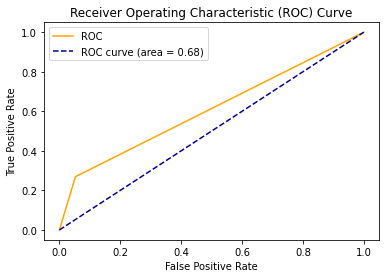

In [144]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# KNN

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=100)

In [147]:
from sklearn.neighbors import KNeighborsClassifier

In [148]:
knn=KNeighborsClassifier()

In [149]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [150]:
pred=knn.predict(x_test)

In [151]:
from sklearn.metrics import classification_report,confusion_matrix

In [152]:
print(confusion_matrix(y_test,pred))

[[81 14]
 [17  9]]


In [153]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.83      0.85      0.84        95
         1.0       0.39      0.35      0.37        26

    accuracy                           0.74       121
   macro avg       0.61      0.60      0.60       121
weighted avg       0.73      0.74      0.74       121



# choosing k value

In [154]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    error_rate.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'Error Rate')

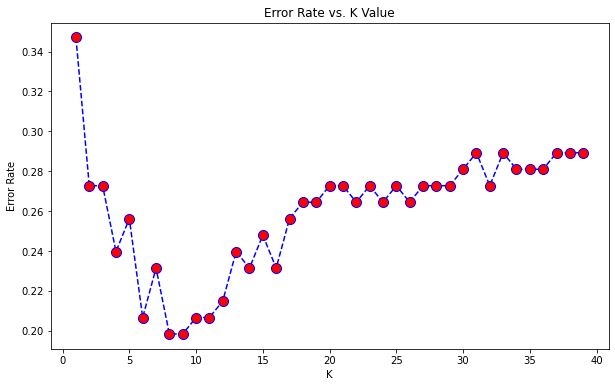

In [155]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [156]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[72 23]
 [19  7]]


              precision    recall  f1-score   support

         0.0       0.79      0.76      0.77        95
         1.0       0.23      0.27      0.25        26

    accuracy                           0.65       121
   macro avg       0.51      0.51      0.51       121
weighted avg       0.67      0.65      0.66       121



In [157]:
# NOW WITH K=20
knn = KNeighborsClassifier(n_neighbors=19)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=19')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=19


[[85 10]
 [22  4]]


              precision    recall  f1-score   support

         0.0       0.79      0.89      0.84        95
         1.0       0.29      0.15      0.20        26

    accuracy                           0.74       121
   macro avg       0.54      0.52      0.52       121
weighted avg       0.69      0.74      0.70       121



In [158]:
conf_mat = confusion_matrix(y_test,pred)

In [159]:
conf_mat

array([[85, 10],
       [22,  4]], dtype=int64)

In [160]:
true_positive  = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative  = conf_mat[1][1]

In [161]:
accuracy_score(y_test,pred)

0.7355371900826446

In [162]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.8947368421052632

In [163]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.794392523364486

In [164]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8415841584158417

In [165]:
auc = roc_auc_score(y_test, pred)
auc

0.5242914979757084

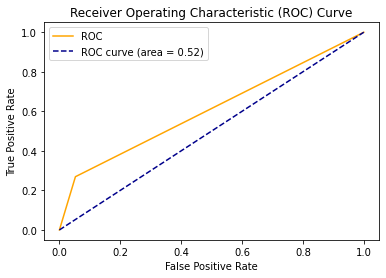

In [166]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# SVM

In [167]:
from  sklearn.model_selection import train_test_split

In [168]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=85)

In [169]:
from sklearn.svm import SVC

In [170]:
svm=SVC()

In [171]:
svm.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [172]:
pred=svm.predict(x_test)

In [173]:
from sklearn.metrics import classification_report,confusion_matrix

In [174]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88        95
         1.0       0.00      0.00      0.00        26

    accuracy                           0.79       121
   macro avg       0.39      0.50      0.44       121
weighted avg       0.62      0.79      0.69       121



C:\Users\USER1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [175]:
print(confusion_matrix(y_test,pred))

[[95  0]
 [26  0]]


In [176]:
true_positive  = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative  = conf_mat[1][1]

In [177]:
accuracy_score(y_test,pred)

0.7851239669421488

In [178]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.8947368421052632

In [179]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.794392523364486

In [180]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8415841584158417

In [181]:
auc = roc_auc_score(y_test, pred)
auc

0.5

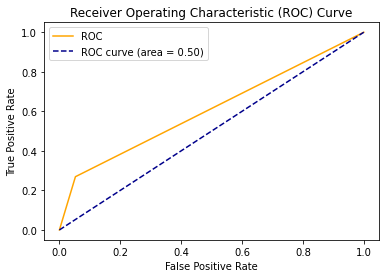

In [182]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [183]:
from sklearn.externals import joblib

C:\Users\USER1\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [185]:
joblib.dump(nbc,'nbc_model.pkl')

['nbc_model.pkl']

In [186]:
df.head()

age  ed  employ  address  income  creddebt   othdebt  default
1   27   1      10        6      31  1.362202  4.000798      0.0
2   40   1      15       14      55  0.856075  2.168925      0.0
4   24   2       2        0      28  1.787436  3.056564      1.0
5   41   2       5        5      25  0.392700  2.157300      0.0
7   43   1      12       11      38  0.128592  1.239408      0.0